<a href="https://colab.research.google.com/github/mcnica89/MATH4060/blob/main/Week_5B_Gridworld_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

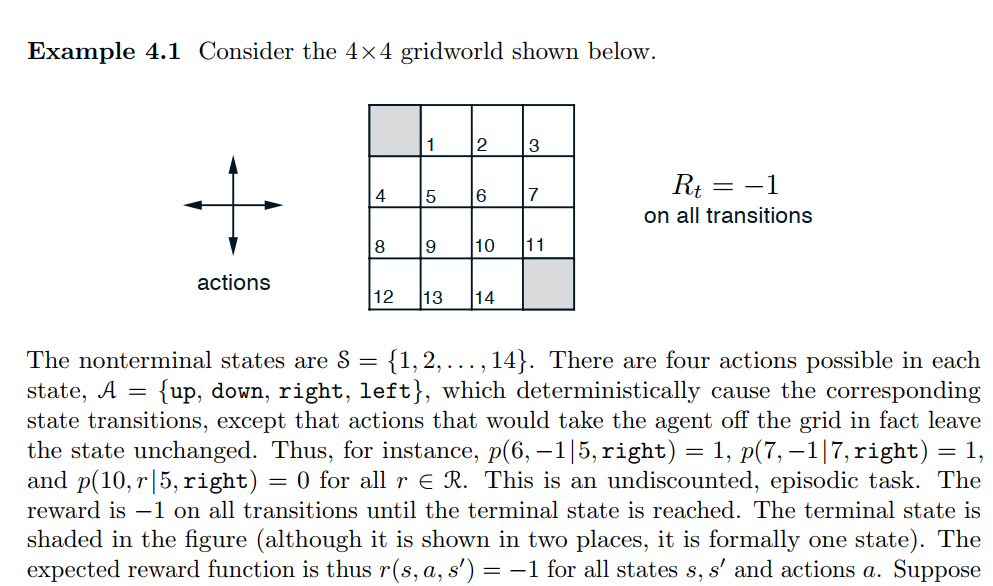

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

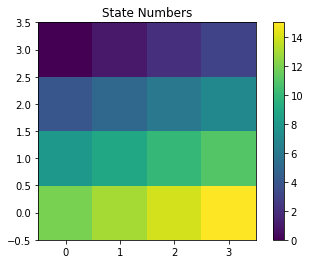

In [ ]:
#Conventions:
#State 0 is the terminal state
#The order of actions are:
#Right = 0
#Up = 1
#Left = 2
#Down = 3 
#(So you can determine directions using cos( pi/2* a) and sin(pi/2 * a))

x_coord_of_state = np.array([0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3])
y_coord_of_state = np.array([3,3,3,3,2,2,2,2,1,1,1,1,0,0,0,0])

state_of_coord = np.array([[12,8,4,0],[13,9,5,1],[14,10,6,2],[15,11,7,3]])

def gridworld_next_state(state,action):
  '''Returns the next state given the current state and action chosen'''
  x = x_coord_of_state[state]
  y = y_coord_of_state[state]

  dir_x = round(np.cos(np.pi/2*action))
  dir_y = round(np.sin(np.pi/2*action))

  new_x = x + dir_x
  new_y = y + dir_y

  if new_x > 3 or new_x < 0 or new_y > 3 or new_y < 0:
    return state
  else:
    return state_of_coord[new_x,new_y]

def is_terminal(state):
  '''Returns whether or not a given state is terminal'''
  if state == 0 or state == 15:
    return True
  else:
    return False

def visualize_function(state_function,title_text):
  #Convert any state function into a matrix and plot it
  Matrix = np.zeros((4,4))
  for s in range(16):
    Matrix[y_coord_of_state[s],x_coord_of_state[s]] = state_function[s]

  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.imshow(Matrix, origin='lower')
  
  fig.colorbar(cax)
  plt.title(title_text)
  plt.show()

visualize_function(np.arange(16),"State Numbers")

In [ ]:
def monte_carlo_value_function(policy, num_episodes=10):
  '''Inputs a policy (an array from state space to action space) and estimates the value function'''
  value_function = np.zeros(16)
  num_visits = np.zeros(16)

  for i in range(num_episodes):
    
    #PART I: Generate a history of observing the robot
    current_state = np.random.randint(1,14) #start at a random state!
    #Create one episode of history up to max_time
    current_time = 0
    max_time = 10
    state_history = np.zeros(max_time+1,dtype=np.int)
    reward_history = np.zeros(max_time+1)

    while True: 
      state_history[current_time] = current_state
      if is_terminal(current_state) or current_time >= max_time:
        reward_history[current_time] = 0
        break
      else:
        reward_history[current_time] = -1   
      
      #THIS IS THE MOST IMPORTANT LINE OF PART I:
      current_state = gridworld_next_state(current_state,policy[current_state]) 
      current_time += 1

    t_final = current_time
    
    
    #PART II
    #Now update the value function for states we saw this episode
    #We are using the first visit monte carlo rule!
    
    visited_already = np.zeros(16,dtype=np.bool)
    for t in range(0,t_final+1):
      state = state_history[t]
      if visited_already[state] == False:
        G = np.sum(reward_history[t:t_final])
        num_visits[state] += 1
        
        #This line actually computes the AVERAGE of G over all the visits!
        #Homework: Figure out why this line is actually computing the average!
        #i..e value_function[state] will be = average of G's over all observations
        value_function[state] += (G - value_function[state])/num_visits[state]

        visited_already[state] = True
  
  return value_function





In [ ]:
def greedy_policy(value_function):
  policy = np.zeros(16)
  for state in range(16):
    best_action = -1
    best_value = -np.inf
    for action in range(4):
      new_state = gridworld_next_state(state,action)
      if value_function[new_state] > best_value:
        best_action = action
        best_value = value_function[new_state]

    policy[state] = best_action
  return policy

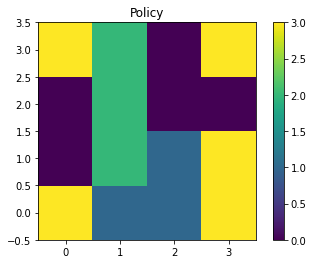

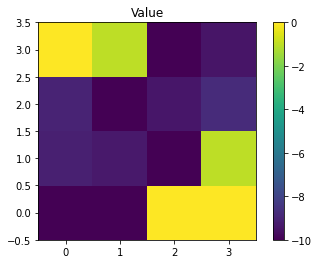

In [ ]:
policy = np.random.randint(0,4,16)
value_func = monte_carlo_value_function(policy,100)
visualize_function(policy,"Policy")
visualize_function(value_func,"Value")

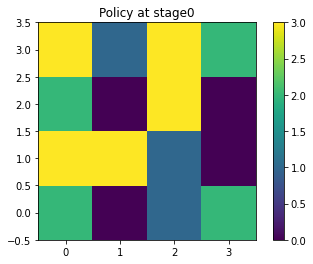

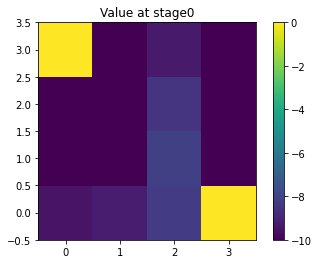

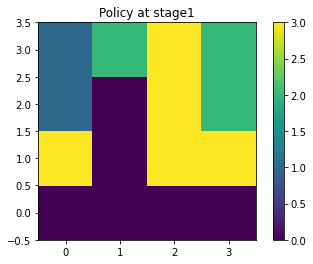

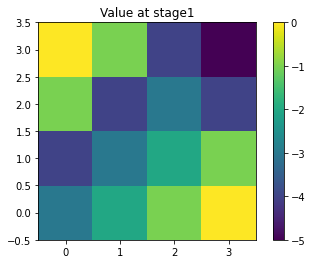

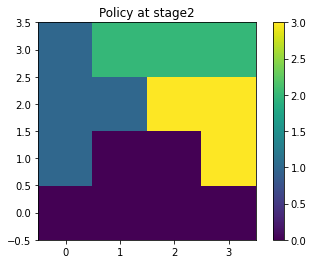

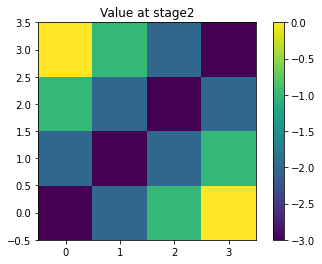

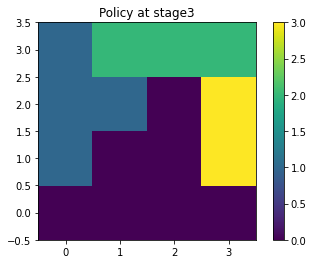

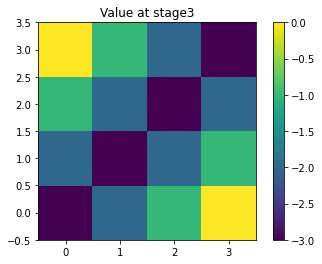

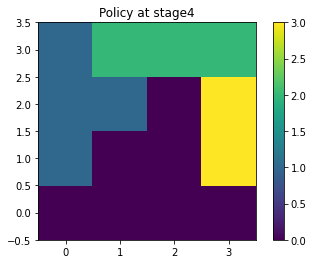

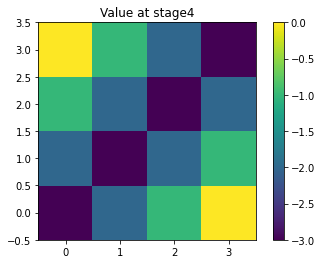

In [ ]:
policy = np.random.randint(0,4,16)
for i in range(5):
  value_func = monte_carlo_value_function(policy,100)
  visualize_function(policy,"Policy at stage"+str(i))
  visualize_function(value_func,"Value at stage"+str(i))
  policy = greedy_policy(value_func)